<a href="https://colab.research.google.com/github/lovishkanther11/Deep-Learning/blob/master/DL_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2275 - acc: 0.9311 - val_loss: 0.0974 - val_acc: 0.9676
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0849 - acc: 0.9737 - val_loss: 0.0784 - val_acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0555 - acc: 0.9831 - val_loss: 0.0801 - val_acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0398 - acc: 0.9877 - val_loss: 0.1143 - val_acc: 0.9664
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0295 - acc: 0.9909 - val_loss: 0.0768 - val_acc: 0.9809
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0747 - val_acc: 0.9822
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.0757 - val_acc

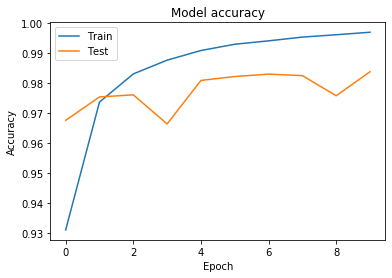

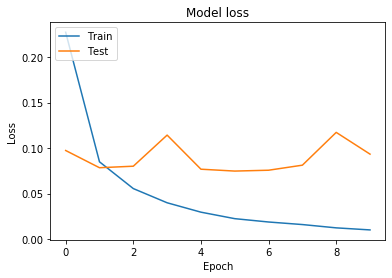

ValueError: ignored

In [0]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10
#MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.summary()

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=epochs)

170500096/170498071 [==============================] - 12s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 98us/step - loss: 1.9247 - acc: 0.2928 - val_loss: 1.7717 - val_acc: 0.3570
Epoch 2/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.7125 - acc: 0.3795 - val_loss: 1.6408 - val_acc: 0.4118
Epoch 3/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.6066 - acc: 0.4199 - val_loss: 1.5307 - val_acc: 0.4543
Epoch 4/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.5357 - acc: 0.4482 - val_loss: 1.4844 - val_acc: 0.4736
Epoch 5/10
50000/50000 [==============================] - 4s 87us/step - loss: 1.4757 - acc: 0.4701 - val_loss: 1.5217 - val_acc: 0.4536
Epoch 6/10
50000/50000 [==============================] - 4s 86us/step - loss: 1.4310 - acc: 0.4862 - val_loss: 1.4236 - val_acc: 0.4951
Epoch 7/10
50000/50000 [==============================] - 4s

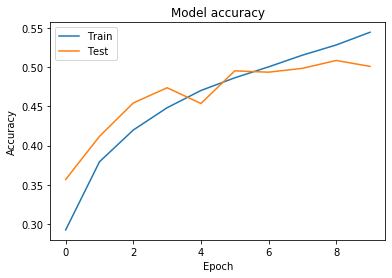

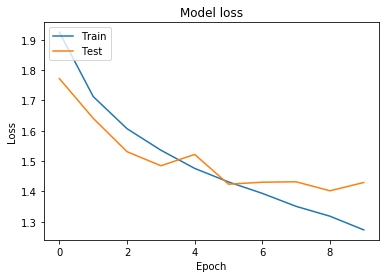

ValueError: ignored

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
#CIFAR10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = to_categorical(Y_train, 10)
Y_test =  to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.summary()

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=epochs)



4423680/4422102 [==============================] - 2s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.4936 - acc: 0.8266 - val_loss: 2.3310 - val_acc: 0.8528
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3635 - acc: 0.8694 - val_loss: 2.2411 - val_acc: 0.8588
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3269 - acc: 0.8804 - val_loss: 2.1072 - val_acc: 0.8669
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3002 - acc: 0.8902 - val_loss: 2.0277 - val_acc: 0.8713
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2800 - acc: 0.8960 - val_loss: 2.2644 - val_acc: 0.8572
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2634 - acc: 0.9019 - val_loss: 2.0804 - val_acc: 0.8694
Epoch 7/10
60000/60000 [==============================] - 3s 46us

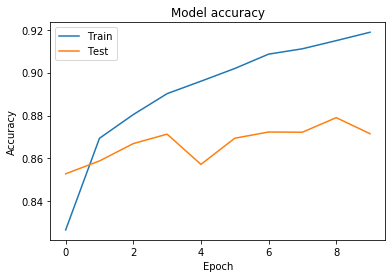

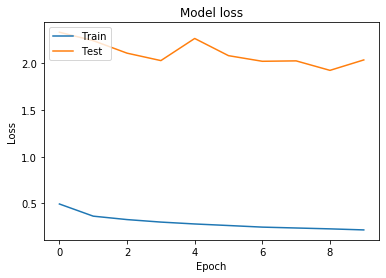

In [0]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

#FASHION_MNIST
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))

Y_train = to_categorical(Y_train, NUM_CLASSES)
Y_test = to_categorical(Y_test, NUM_CLASSES)

model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.summary()

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#IRIS
iris_data = load_iris()
	
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.01)
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)
results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))
model.summary()


Epoch 1/200
 - 0s - loss: 1.1312 - acc: 0.2703
Epoch 2/200
 - 0s - loss: 0.9208 - acc: 0.4662
Epoch 3/200
 - 0s - loss: 0.7966 - acc: 0.6622
Epoch 4/200
 - 0s - loss: 0.7202 - acc: 0.7365
Epoch 5/200
 - 0s - loss: 0.6720 - acc: 0.7432
Epoch 6/200
 - 0s - loss: 0.6326 - acc: 0.7703
Epoch 7/200
 - 0s - loss: 0.6000 - acc: 0.7770
Epoch 8/200
 - 0s - loss: 0.5659 - acc: 0.8649
Epoch 9/200
 - 0s - loss: 0.5423 - acc: 0.8041
Epoch 10/200
 - 0s - loss: 0.5183 - acc: 0.9257
Epoch 11/200
 - 0s - loss: 0.4950 - acc: 0.8851
Epoch 12/200
 - 0s - loss: 0.4735 - acc: 0.9595
Epoch 13/200
 - 0s - loss: 0.4567 - acc: 0.9189
Epoch 14/200
 - 0s - loss: 0.4370 - acc: 0.8311
Epoch 15/200
 - 0s - loss: 0.4185 - acc: 0.9662
Epoch 16/200
 - 0s - loss: 0.4044 - acc: 0.9459
Epoch 17/200
 - 0s - loss: 0.3881 - acc: 0.9459
Epoch 18/200
 - 0s - loss: 0.3661 - acc: 0.9459
Epoch 19/200
 - 0s - loss: 0.3515 - acc: 0.9459
Epoch 20/200
 - 0s - loss: 0.3438 - acc: 0.9392
Epoch 21/200
 - 0s - loss: 0.3321 - acc: 0.9257
E

In [0]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
#CIFAR100
(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = to_categorical(Y_train, 100)
Y_test =  to_categorical(Y_test, 100)

model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


